# Análisis exploratorio Covid INS Colombia 

Datos: ins Colombia

## librerias utilizadas

In [138]:
import numpy as np
import pandas as pd
from urllib.request import urlopen
import json
from sodapy import Socrata
import seaborn as sns
import os

In [65]:
path = "8May_2"

## Lectura de la INS

In [122]:
client = Socrata("www.datos.gov.co", None)  
results = client.get("gt2j-8ykr", limit=100000)
df = pd.DataFrame.from_records(results)

In [123]:
df.head()

,id_de_caso,fecha_de_notificaci_n,codigo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_de_muerte,fecha_diagnostico,fecha_recuperado,fecha_reporte_web
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,Italia,2020-02-27T00:00:00.000,- -,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,España,2020-03-04T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,España,2020-02-29T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,Colombia,2020-03-06T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,Colombia,2020-03-08T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000


### Cambiar nombres de las columnas

In [124]:
nombres = {
    "id_de_caso": "id",
    "fecha_de_notificaci_n": "fecha de notificacion",
    "ciudad_de_ubicaci_n": "ciudad",
    "atenci_n": "atencion",
    "pa_s_de_procedencia": "procedencia"
}
df = df.rename(columns=nombres)
df["edad"] = df["edad"].astype(str)
df["edad"] = df["edad"].apply(lambda x: np.where(x.isdigit(),x,np.nan))
df["edad"] = df["edad"].astype(float)
df.head()

,id,fecha de notificacion,codigo_divipola,ciudad,departamento,atencion,edad,sexo,tipo,estado,procedencia,fis,fecha_de_muerte,fecha_diagnostico,fecha_recuperado,fecha_reporte_web
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19.0,F,Importado,Leve,Italia,2020-02-27T00:00:00.000,- -,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34.0,M,Importado,Leve,España,2020-03-04T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50.0,F,Importado,Leve,España,2020-02-29T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55.0,M,Relacionado,Leve,Colombia,2020-03-06T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25.0,M,Relacionado,Leve,Colombia,2020-03-08T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000


### Cambiar a tipo fecha las columnas de fechas
errors="coerce" es para que las fechas que no son validas no las borre sino que deje un NaT

In [125]:
df["fecha de notificacion"] = pd.to_datetime(df["fecha de notificacion"], errors="coerce")
df["fecha_recuperado"] = pd.to_datetime(df["fecha_recuperado"], errors="coerce")
df["fecha_de_muerte"] = pd.to_datetime(df["fecha_de_muerte"], errors="coerce")
df["fecha_diagnostico"] = pd.to_datetime(df["fecha_diagnostico"], errors="coerce")
df["fis"] = pd.to_datetime(df["fis"], errors="coerce")

In [126]:
df_drec = df.loc[:,["id", "ciudad", "edad", "fecha_de_muerte", "fecha_recuperado", "fecha de notificacion"]]
df_drec.head()

,id,ciudad,edad,fecha_de_muerte,fecha_recuperado,fecha de notificacion
0,1,Bogotá D.C.,19.0,NaT,2020-03-13,2020-03-02
1,2,Guadalajara de Buga,34.0,NaT,2020-03-19,2020-03-06
2,3,Medellín,50.0,NaT,2020-03-15,2020-03-07
3,4,Medellín,55.0,NaT,2020-03-26,2020-03-09
4,5,Medellín,25.0,NaT,2020-03-23,2020-03-09


## Acumulados por ciudad

In [127]:
df_ciudades = df_drec.groupby(["fecha de notificacion", "ciudad"])["id"].count().to_frame("cuenta").reset_index()
df_ciudades = df_ciudades[df_ciudades["ciudad"].isin(["Bogotá D.C.", "Medellín", "Villavicencio", "Cali"])]
df_ciudades = df_ciudades.pivot_table(values='cuenta', index=df_ciudades["fecha de notificacion"], columns='ciudad', aggfunc='first')
df_ciudades.head()

ciudad,Bogotá D.C.,Cali,Medellín,Villavicencio
fecha de notificacion,,,,
2020-03-02,1.0,NaN,NaN,NaN
2020-03-07,NaN,NaN,1.0,NaN
2020-03-08,1.0,NaN,NaN,NaN
2020-03-09,1.0,NaN,2.0,NaN
2020-03-11,5.0,NaN,3.0,NaN


## Acumulado total

In [128]:
acum_total = df.groupby("fecha de notificacion")["id"].count().to_frame("Colombia")

## Union

In [129]:
df_acum = acum_total.join(df_ciudades).fillna(0).apply("cumsum")

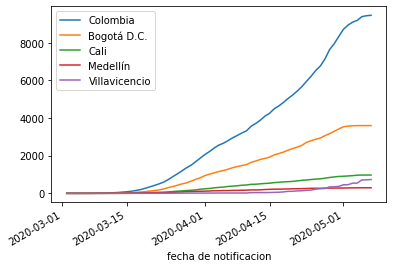

In [130]:
df_acum.plot()

In [131]:
df_acum.to_csv(path + "/acumulados.csv")

## Edades por fallecidos y recuperados

In [132]:
edad_inferior = list(range(0, 100, 10))
edad_superior = [e + 10 for e in edad_inferior]
edad_inferior.append(0)
edad_superior.append(100)

In [133]:
df

,id,fecha de notificacion,codigo_divipola,ciudad,departamento,atencion,edad,sexo,tipo,estado,procedencia,fis,fecha_de_muerte,fecha_diagnostico,fecha_recuperado,fecha_reporte_web
0,1,2020-03-02,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19.0,F,Importado,Leve,Italia,2020-02-27,NaT,2020-03-06,2020-03-13,2020-03-06T00:00:00.000
1,2,2020-03-06,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34.0,M,Importado,Leve,España,2020-03-04,NaT,2020-03-09,2020-03-19,2020-03-09T00:00:00.000
2,3,2020-03-07,5001,Medellín,Antioquia,Recuperado,50.0,F,Importado,Leve,España,2020-02-29,NaT,2020-03-09,2020-03-15,2020-03-09T00:00:00.000
3,4,2020-03-09,5001,Medellín,Antioquia,Recuperado,55.0,M,Relacionado,Leve,Colombia,2020-03-06,NaT,2020-03-11,2020-03-26,2020-03-11T00:00:00.000
4,5,2020-03-09,5001,Medellín,Antioquia,Recuperado,25.0,M,Relacionado,Leve,Colombia,2020-03-08,NaT,2020-03-11,2020-03-23,2020-03-11T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9451,9492,2020-04-27,11001,Bogotá D.C.,Bogotá D.C.,Casa,39.0,M,En estudio,Leve,Colombia,2020-04-26,NaT,2020-05-07,NaT,2020-05-07T00:00:00.000
9452,9493,2020-05-04,11001,Bogotá D.C.,Bogotá D.C.,Fallecido,82.0,M,En estudio,Fallecido,Colombia,2020-05-01,2020-05-06,2020-05-07,NaT,2020-05-07T00:00:00.000
9453,9494,2020-05-04,11001,Bogotá D.C.,Bogotá D.C.,Casa,37.0,M,En estudio,Leve,Colombia,2020-05-04,NaT,2020-05-07,NaT,2020-05-07T00:00:00.000
9454,9495,2020-05-04,11001,Bogotá D.C.,Bogotá D.C.,Casa,25.0,M,En estudio,Leve,Colombia,2020-05-04,NaT,2020-05-07,NaT,2020-05-07T00:00:00.000


In [141]:
estados = ["fecha_de_muerte", "fecha_recuperado"]
for estado in estados:
    nombre_dir = f"{path}/por_edades/{estado}"
    os.mkdir(nombre_dir) 
        
        
for i, inferior in enumerate(edad_inferior):
    print(inferior)
    superior = edad_superior[i]

    df_edad = df[((df["edad"] >= inferior) & (df["edad"] < superior))]
    for estado in estados:
        df_ciudades = df_edad.groupby([estado, "ciudad"])["id"].count().to_frame("cuenta").reset_index()
        df_ciudades = df_ciudades[df_ciudades["ciudad"].isin(["Bogotá D.C.", "Medellín", "Villavicencio", "Cali"])]
        df_ciudades = df_ciudades.pivot_table(values='cuenta', index=df_ciudades[estado], columns='ciudad', aggfunc='first')
        acum_total = df_edad.groupby(estado)["id"].count().to_frame("Colombia")
        df_acum = acum_total.join(df_ciudades).fillna(0).apply("cumsum")
        nombre_dir = f"{path}/por_edades/{estado}"
        df_acum.to_csv(f"{nombre_dir}/edad_{inferior}_{superior}.csv")
        
    
    

0
10
20
30
40
50
60
70
80
90
0


In [144]:
df[df["ciudad"] == "Medellín"][df["estado"]=="Fallecido"]

<ipython-input-144-3b6c781d316f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["ciudad"] == "Medellín"][df["estado"]=="Fallecido"]


,id,fecha de notificacion,codigo_divipola,ciudad,departamento,atencion,edad,sexo,tipo,estado,procedencia,fis,fecha_de_muerte,fecha_diagnostico,fecha_recuperado,fecha_reporte_web
1513,1514,2020-04-03,5001,Medellín,Antioquia,Fallecido,91.0,F,En estudio,Fallecido,Colombia,2020-03-20,2020-04-03,2020-04-06,NaT,2020-04-06T00:00:00.000
3152,3153,2020-04-09,5001,Medellín,Antioquia,Fallecido,67.0,M,Relacionado,Fallecido,Colombia,2020-04-01,2020-04-18,2020-04-16,NaT,2020-04-16T00:00:00.000
3634,3635,2020-04-16,5001,Medellín,Antioquia,Fallecido,74.0,M,Relacionado,Fallecido,Colombia,2020-04-14,2020-04-27,2020-04-19,NaT,2020-04-19T00:00:00.000
